In [9]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
%matplotlib inline
%run -i ../../tools/label_encoder.py
%run -i ../../tools/predict_functions.py

# Biology

### DecisionTreeRegressor

In [2]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')

In [3]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = X_list)
Y = S_data.filter(items = y_list)

Mean Score: 8.56373958951


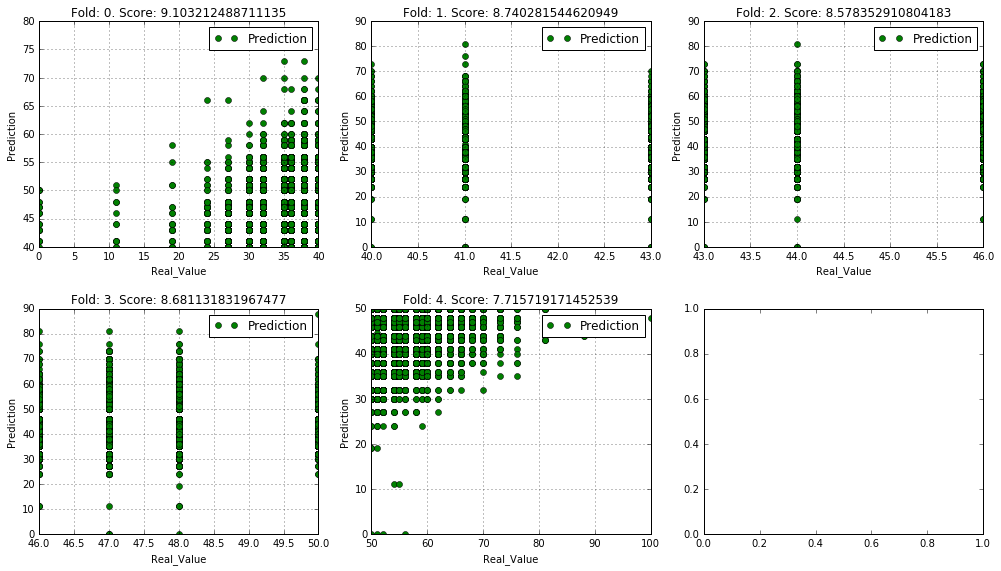

In [13]:
tree = DecisionTreeRegressor()
kf = KFold(X.shape[0], n_folds=5)
plot_predictions_KF(tree, 'PUNT_BIOLOGIA', X, Y, kf)

Mean Score: 8.94385641786
elapsed_time: 16.116985321044922


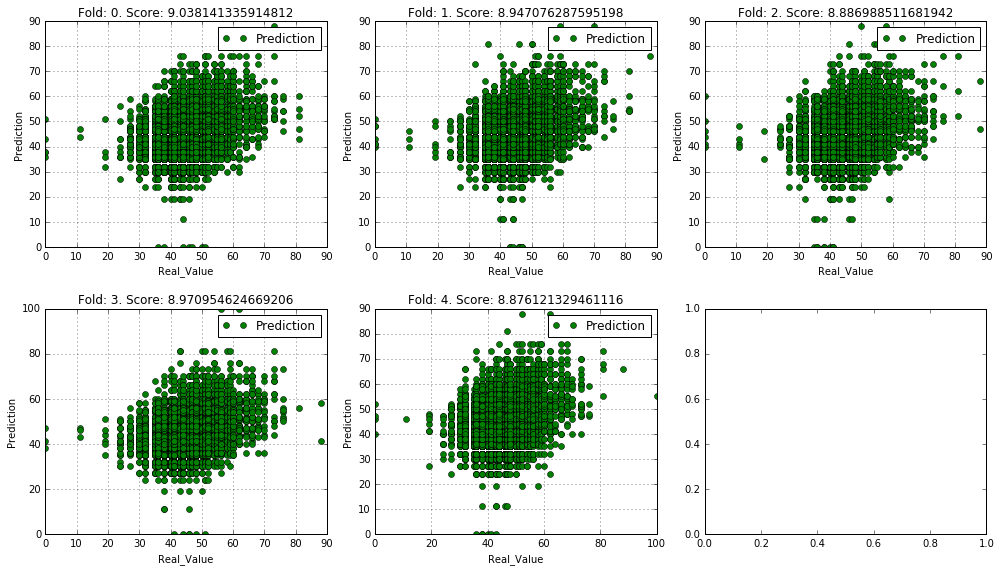

In [14]:
tree = DecisionTreeRegressor()
kf = KFold(X.shape[0], n_folds=5, shuffle = True)
plot_predictions_KF(tree, 'PUNT_BIOLOGIA', X, Y, kf)

Mean Score: 9.04934723808


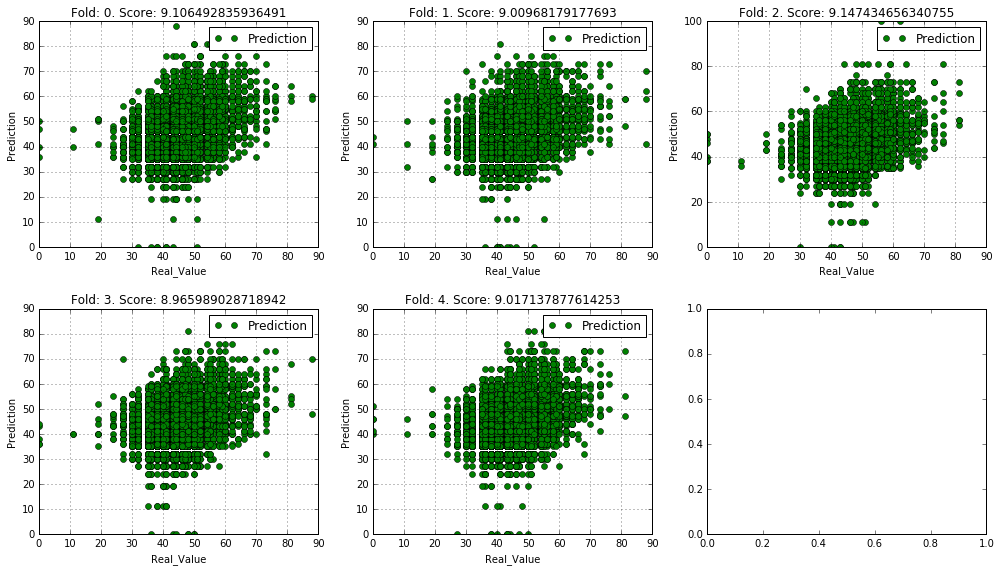

In [15]:
tree = DecisionTreeRegressor()
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(tree, 'PUNT_BIOLOGIA', X, Y, rs)

#### POLYNOMIAL
exp = 2

The Model with the Data raised to the power of 2 gives:
Mean Score: 8.57868097433


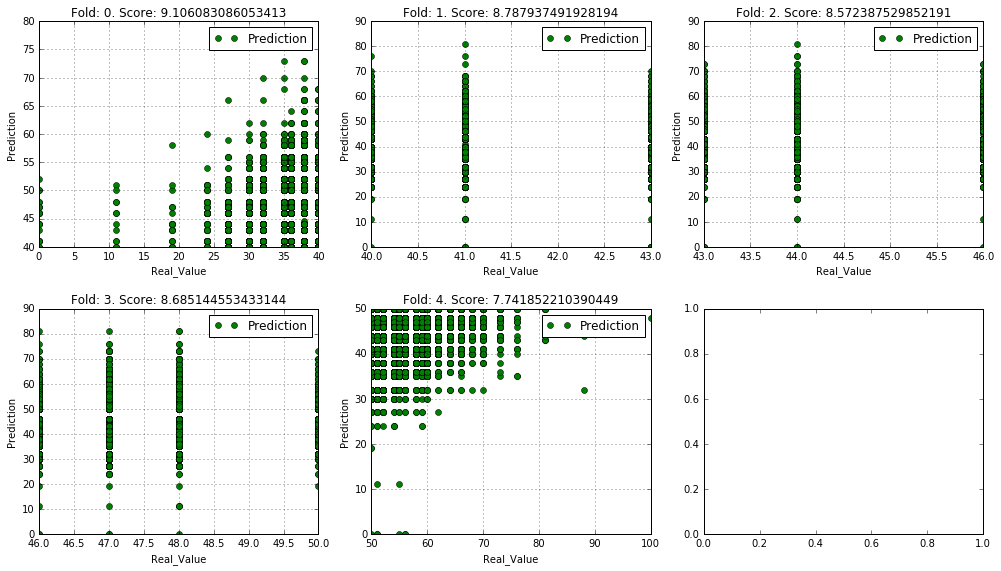

In [16]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 8.94129396872


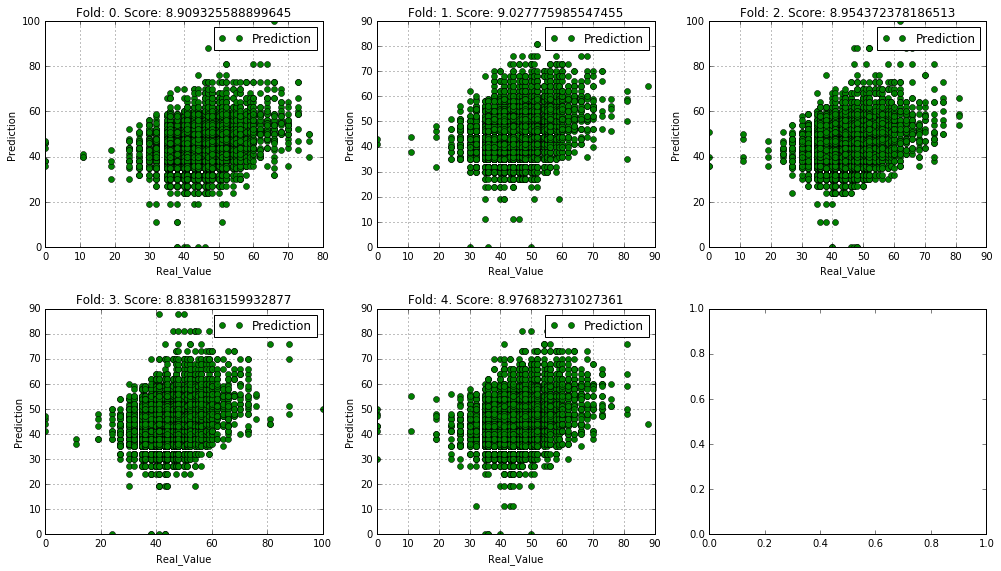

In [18]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the Data raised to the power of 2 gives:
Mean Score: 9.05906062979


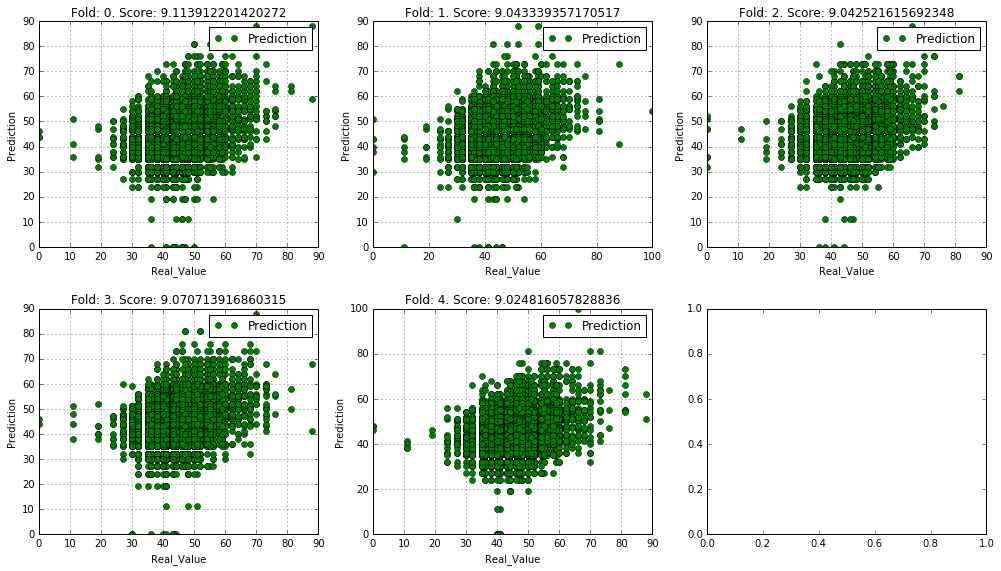

In [19]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

Con exp 3

The Model with the Data raised to the power of 3 gives:
Mean Score: 8.56550866731


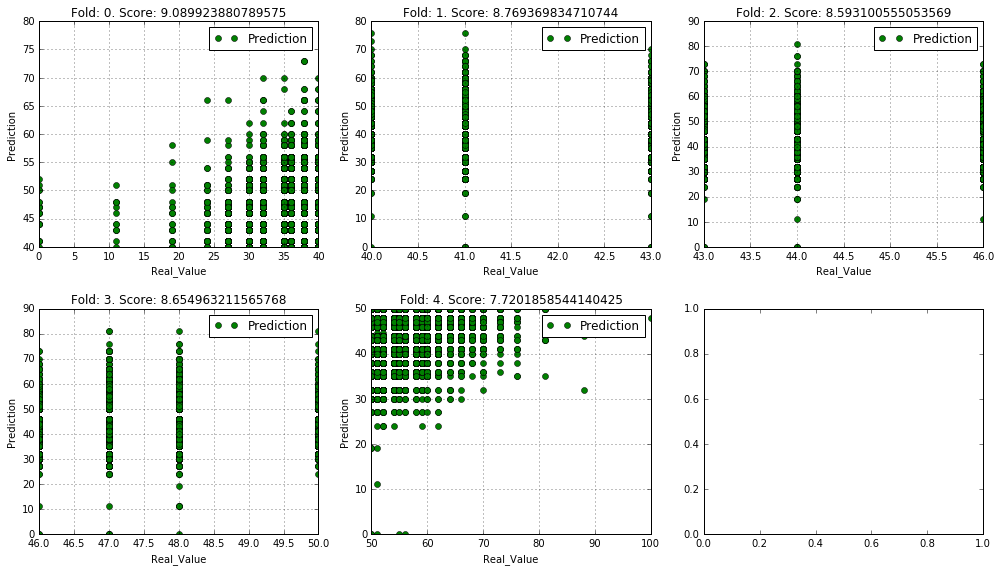

In [17]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 3 gives:
Mean Score: 9.02086216663


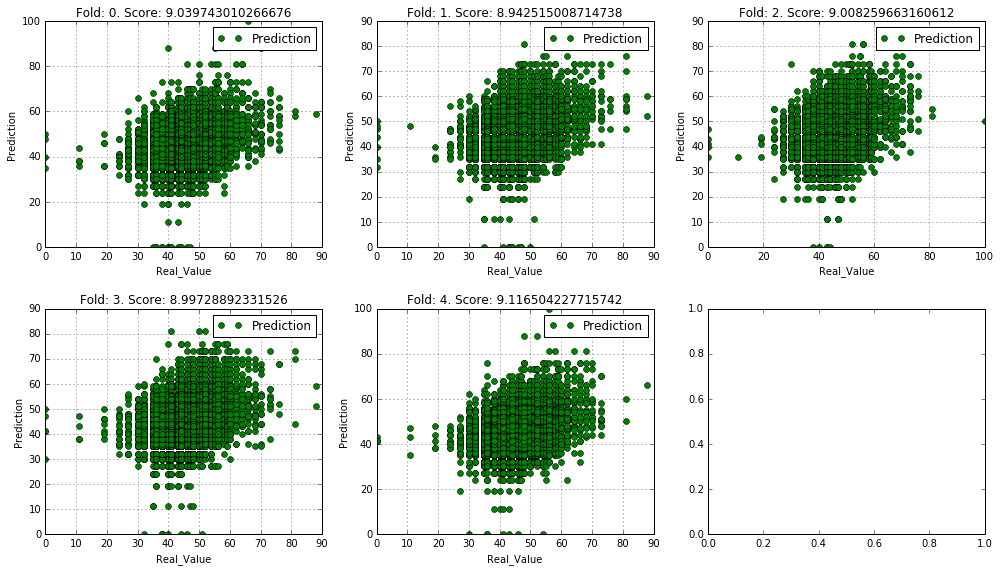

In [20]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the Data raised to the power of 3 gives:
Mean Score: 9.060410384


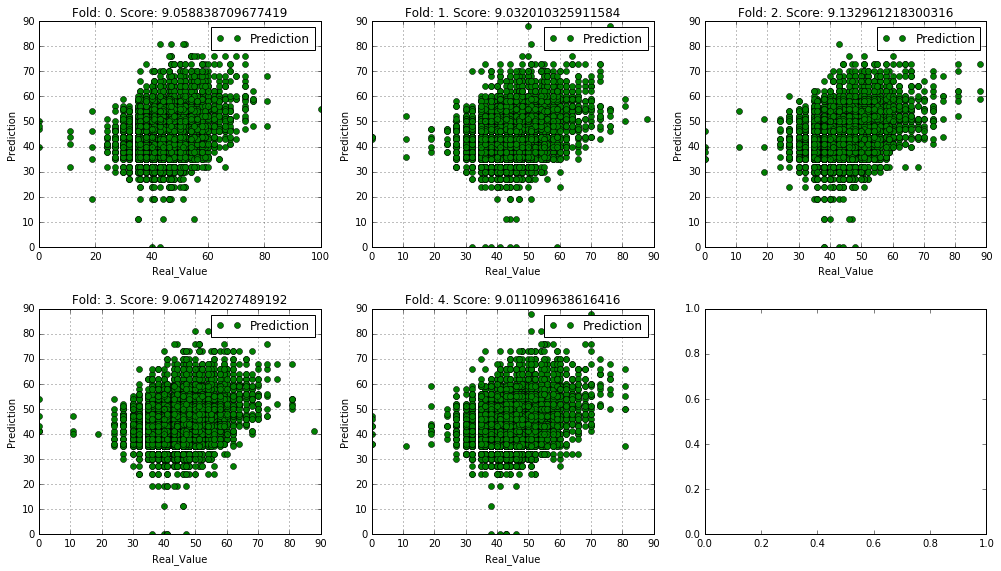

In [21]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

### Polynomial Features
degree = 2

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 8.60893477454
The prediction took: 415.1168806552887 seconds


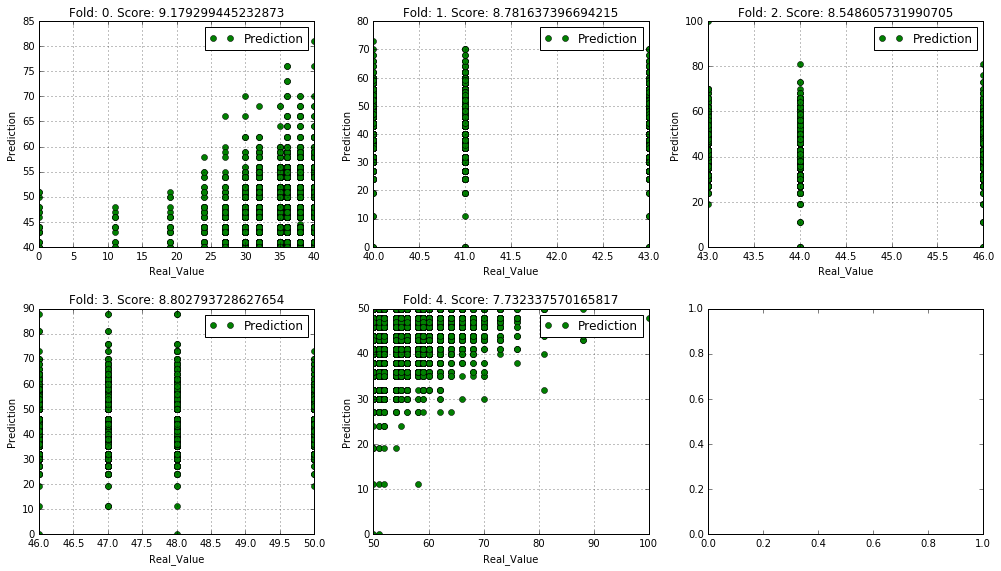

In [22]:
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 8.93835212606
The prediction took: 510.22644209861755 seconds


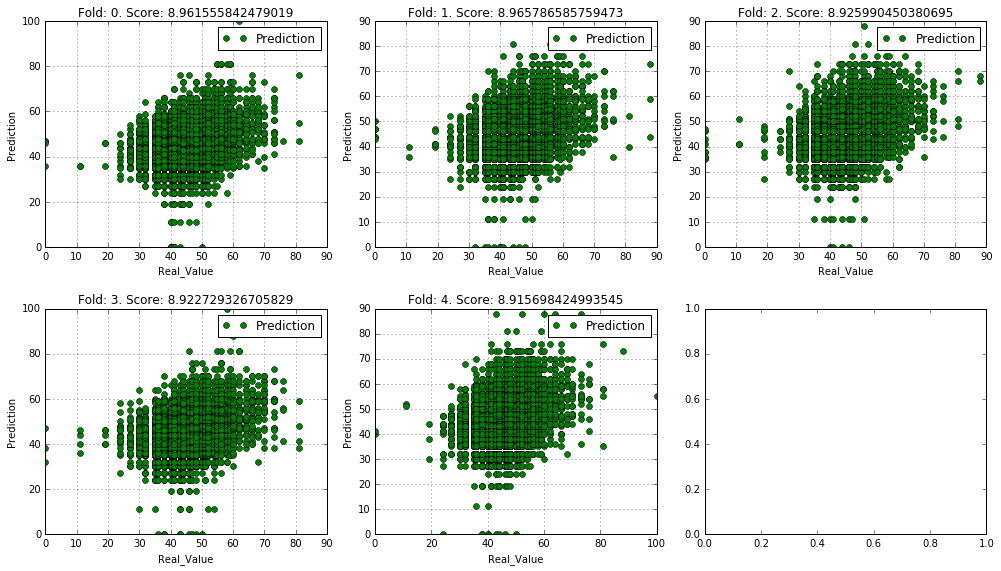

In [24]:
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 6.25348987227
The prediction took: 355.0213315486908 seconds


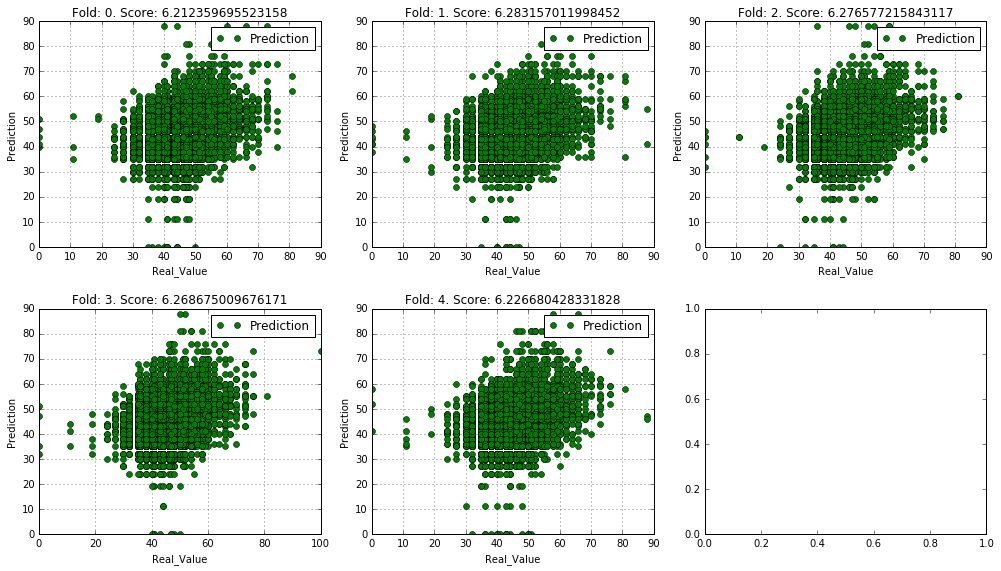

In [30]:
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

Polynomial features 3

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 7.57033744711
The prediction took: 7545.2748992443085 seconds


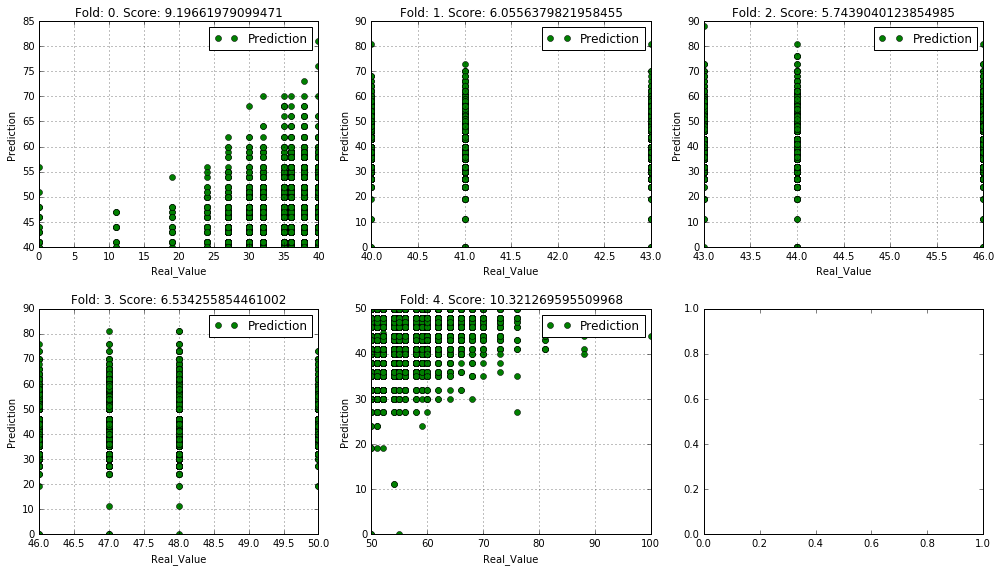

In [4]:
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 6.26644934765
The prediction took: 8555.78446650505 seconds


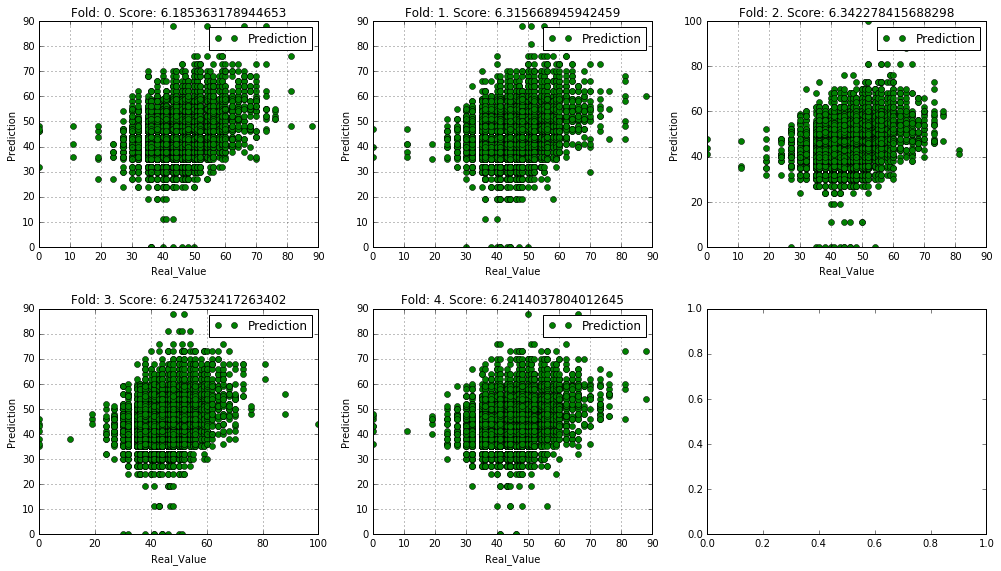

In [7]:
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 6.26917817056
The prediction took: 14274.551358699799 seconds


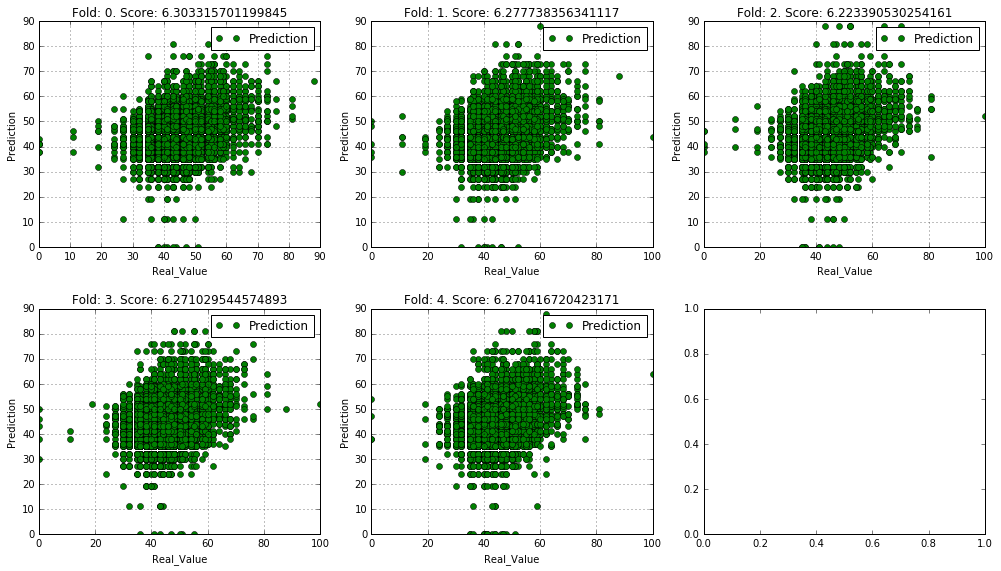

In [4]:
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

### Trying with the New X Data

In [10]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')

In [11]:
def get_Poly_prediction2(estimator, deg, D_sorted, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the degree to the PolynomialFeature object and the sorted data by values of the target,
    return the score of the model, statistics and the plots of the prediction"""
    start_time = time()
    New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    New_X = D_sorted.filter(items = New_x_list)
    Y_train = D_sorted.filter(items = y_list)
    
    Poly = PolynomialFeatures(degree = deg)
    Poly_X = Poly.fit_transform(New_X)
    Poly_X = pd.DataFrame(Poly_X)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = Poly_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(Poly_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    
    print('The Model with the new "PolyData" with degree', deg, 'gives:')
    plot_predictions_KF(estimator, target, Poly_X, Y_train, kf)
    print('The prediction took:', time()-start_time, 'seconds')

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 6.28194426526
The prediction took: 114.50235843658447 seconds


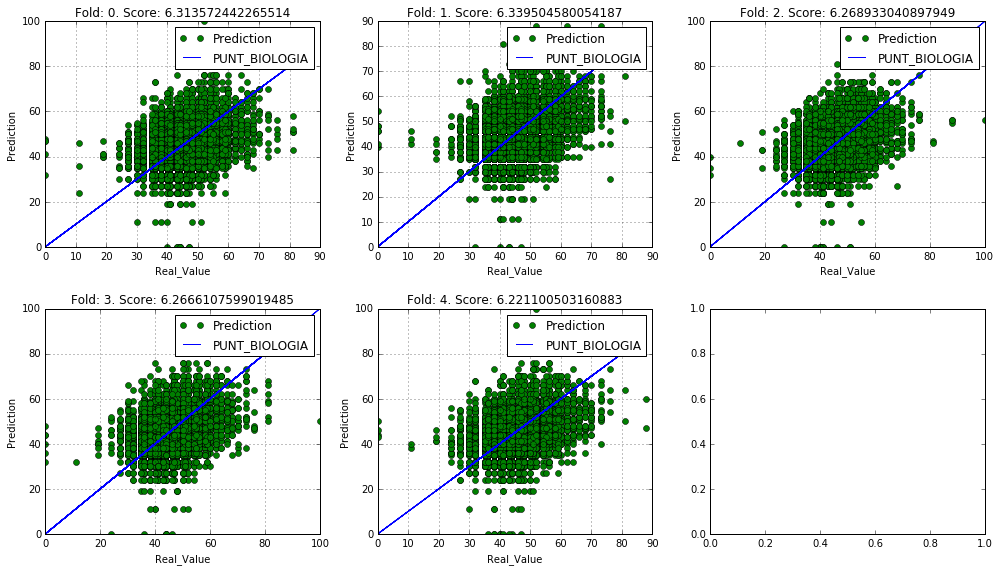

In [12]:
tree = DecisionTreeRegressor()
get_Poly_prediction2(tree, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 6.25562508063
The prediction took: 1324.1668622493744 seconds


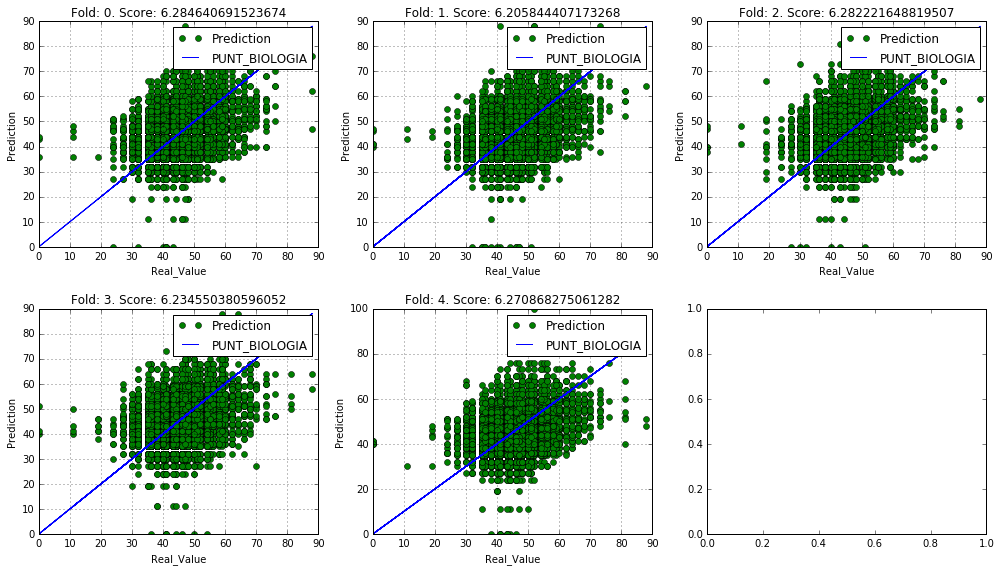

In [13]:
tree = DecisionTreeRegressor()
get_Poly_prediction2(tree, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

# Results Obtained

|        |1       |    2    |      3     |EXP 2       |||EXP 3       |||Poly 2       |||Poly 3      ||| 
|--------|-------:|--------:|-----------:|---:|---:|---:|---:|---:|---:|----:|---:|---:|---:|---:|---:|
|        |KFold   |KFShuffle|ShuffleSplit|1   |2   |3   |1   |2   |3   |1    |2   |3   |1   |2   |3   |
|Biologia|8.56    |8.94     |9.04        |8.57|8.94|9.05|8.56|9.02|9.06|8.6  |8.93|6.25|7.57|6.26|6.26|

The 2 best algorithms are:  

|BEST ALGORITHMS    |Score/time[SEG]    |Score/time[SEG]    |
|--------:          |------------------:|------------------:|
|**Algorithm**      |Poly 2/ShuffleSplit|Poly 3/ShuffleSplit|
|**Old Data**       |6.25 / 355.02      |6.26 / 14274.55    |
|**New X Data**     |6.28 / 114.5       |6.25 / 1324.16     |

As we can see, the both ways are too similar, **BUT** the Polynomial features takes more time with degree 3.  

So the **CHOSEN** way to predict will be the first one, with Polynomial Features with degree 2